**Build an Image Classifier with Python**

# MNIST Handwritten Digit Recognition Project

This project demonstrates the process of building, training, and testing a convolutional neural network (CNN) model using the **MNIST dataset** of handwritten digits (0-9). The CNN model is built using TensorFlow and Keras and is capable of recognizing handwritten digits.

## Project Overview

### Steps involved:
1. **Loading the MNIST Dataset**
   - The dataset contains 70,000 grayscale images of handwritten digits, where:
     - 60,000 images are used for training.
     - 10,000 images are used for testing.
   - Each image has a resolution of 28x28 pixels and is labeled with a digit from 0 to 9.

2. **Preprocessing the Data**
   - The images are reshaped to 4D tensors (28x28 pixels, 1 color channel) to match the input format expected by Keras.
   - The pixel values are normalized by dividing by 255 to convert the range from `[0, 255]` to `[0, 1]`, which helps the neural network converge faster.

3. **Building the CNN Model**
   - The CNN model includes the following layers:
     1. **Conv2D**: 28 filters, kernel size (3x3), followed by ReLU activation.
     2. **MaxPooling2D**: Pooling size (2x2) to reduce spatial dimensions.
     3. **Flatten**: Converts the 2D feature maps into a 1D vector.
     4. **Dense Layer (Fully Connected)**: 64 units with ReLU activation.
     5. **Dropout**: Prevents overfitting by randomly setting 20% of the neurons to zero during training.
     6. **Output Layer (Dense Layer)**: 10 units with Softmax activation for multi-class classification.

4. **Compiling and Training the Model**
   - The model is compiled with:
     - **Adam optimizer**: Efficient and adaptive learning rate adjustment.
     - **Loss function**: Sparse categorical crossentropy, suitable for integer labels in multi-class classification.
     - **Metrics**: Accuracy is tracked to evaluate model performance.
   - The model is trained on the training data for **20 epochs**.

5. **Evaluating the Model**
   - After training, the model is evaluated on the test data to measure accuracy and loss. The accuracy achieved on the test set is approximately **98.46%**.

6. **Testing the Model on a Sample Image**
   - The trained model is tested with a sample handwritten image (`test.jpeg`), which is preprocessed and resized to match the input size of the model (28x28 pixels, grayscale).
   - The image is inverted to match the MNIST data format, then passed through the model for prediction.
   - The model outputs the predicted digit with high accuracy.



# load the Mnist data from Keras

In [8]:
#Here we load the Mnist data from Keras
import tensorflow as tf
# loads the MNIST dataset, which is made up of 70,000 grayscale images of handwritten digits (0-9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data: 60,000 images in the training set; Each image has a resolution of 28x28 pixels.
x_train.shape

(60000, 28, 28)

8


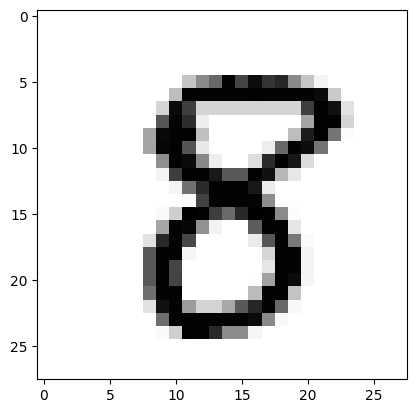

In [9]:
#Here we preview an element of the data
import matplotlib.pyplot as plt
 # Only use this if using iPython
image_index = 333 # You may select anything up to 60,000
print(y_train[image_index]) # To display the label number
# 'Greys' ensures the image is displayed in shades of gray
plt.imshow(x_train[image_index], cmap='Greys') #to show the image associated with label

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

# Reshaping and preprocessing

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

Since these are grayscale images, there is only 1 channel.

In [12]:
#Reshaping and preprocessing
# For 2D image data (like MNIST), Keras usually expects a 4D tensor: (number_of_samples, height, width, channels).
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
# By default, the pixel values are integers (from 0 to 255), neural networks work better when the inputs are floating-point numbers.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

# Build a Convolutional Neural Network (CNN) model

* Sequential: This is used to define a model where you can add layers one by one in a linear fashion.
* Dense: This is the fully connected layer, often used as the output layer or intermediate layers in neural networks.
* Conv2D: This is a 2D convolutional layer, which is used to extract features from images.
  * Conv2D(28, kernel_size=(3, 3)): This layer is a 2D convolutional layer that applies convolution operations to the input images. 28 specifies the number of filters (also called kernels or feature detectors) in the convolutional layer. Each filter is of size 3x3 pixels.
* Dropout: This layer is used to **prevent overfitting** by randomly setting a fraction of input units to 0 during training.
  * Pooling reduces the dimensionality of the image while retaining the most important features by taking the maximum value in each 2x2 region of the feature map.
* Flatten: Converts a 2D matrix of features into a vector so it can be fed into a fully connected (dense) layer. This step is necessary before passing the data to fully connected layers (Dense layers).
* MaxPooling2D: This layer is used to **downsample** the input, reducing its dimensionality and highlighting the most important features.

In [17]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2))
# The final fully connected layer has 10 neurons, corresponding to the 10 possible classes (digits 0-9) in the MNIST dataset.
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         302,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,842 (1.16 MB)

 Trainable params: 303,842 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and fitting the model

* **Compiling the model**: You define how the model will be optimized (Adam optimizer), which loss function to minimize (sparse categorical crossentropy for classification), and what metric to track (accuracy).

* **Fitting the model**: You start the actual training process by fitting the model on the training data. The model will iterate over the data 20 times (epochs), adjusting its weights to minimize the loss and maximize accuracy.


* loss function: **Sparse categorical crossentropy** is used when the labels are integers. If the labels were **one-hot encoded** (i.e., represented as a binary vector), you would use **categorical_crossentropy**

In [19]:
#Compiling and fitting the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8734 - loss: 0.4185
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9662 - loss: 0.1080
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9753 - loss: 0.0771
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9808 - loss: 0.0605
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9838 - loss: 0.0483
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9862 - loss: 0.0433
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9881 - loss: 0.0353
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9898 - loss: 0.0314
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9899 - loss: 0.0293
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.9897 - loss: 0.0297
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9907 - loss: 0.0255
Epoch 12

# evaluating

Computes the loss and any specified metrics (such as accuracy) on the provided test dataset.

In [23]:
#evaluating
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9797 - loss: 0.1130
Test Loss: 0.08540327101945877
Test Accuracy: 0.9846000075340271


# Testing

**reshape(1, 28, 28, 1)**: The test image is reshaped to the required format for model prediction.
* 1 is the batch size (since we're only testing one image at a time).
* 28, 28 are the height and width of the image.
* 1 is the number of channels (grayscale image).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
5


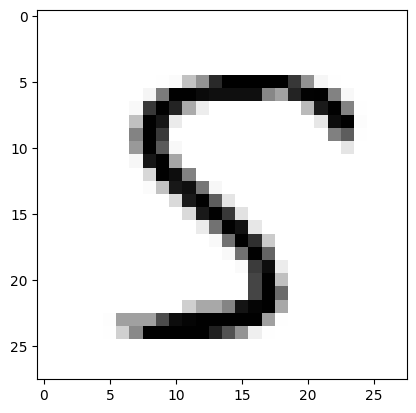

In [22]:
#testing on test data
image_index = 333 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


# Predict download data

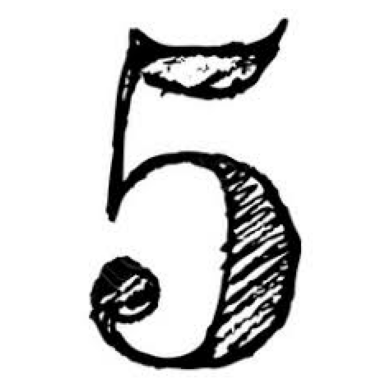

In [25]:
#Previewing the downloaded image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("test.jpeg")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [26]:
im.shape

(225, 225, 3)

In [27]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [29]:
#load downloaded image and resize to target size
img = image.load_img("test.jpeg", target_size=(28, 28),color_mode="grayscale")


In [38]:
img

In [30]:
# This function converts the loaded image to a NumPy array, which can be used as input for a neural network model.
img_array = image.img_to_array(img)


In [31]:
#Confirm new shape
img_array.shape

(28, 28, 1)

## Removing the Extra Dimension
img_array[:, :, 0]: This selects the first (and only) channel of the image. Since the image is grayscale, it only has one channel. By slicing [:, :, 0], you're effectively converting the 3D array (28, 28, 1) into a 2D array (28, 28).

In [32]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

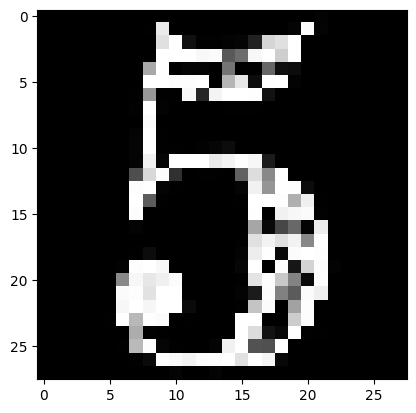

In [33]:
plt.imshow(img_array,cmap="Greys")

## Inverting the Image

This operation inverts the pixel values of the image. Since the pixel values are normalized between 0 and 1 (with 0 representing black and 1 representing white), this operation makes black pixels white and white pixels black.

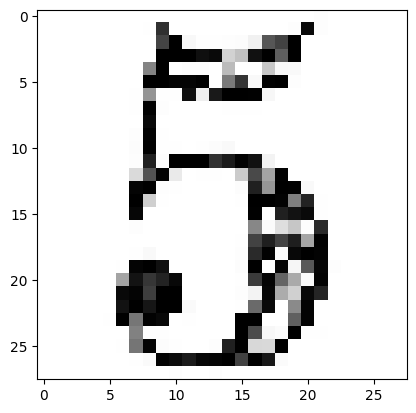

In [34]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

# Prediction on sample image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5


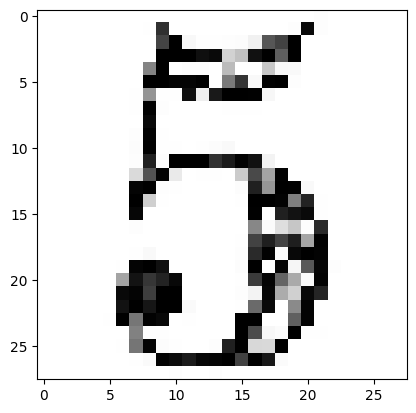

In [35]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())
